In [76]:
import time, psutil, os, sys
import pandas as pd

# Importing suffix structures
from ukkonen import SuffixTree
from suffix_array import SuffixArray

# Importing pattern finding algoritms from previous labs
from utils.kmp_algorithm import kmp_pattern_match
from utils.boyer_moore_algorithm import boyer_moore_pattern_match
from utils.rabin_karp_algorithm import rabin_karp_pattern_match
from utils.aho_corasick_algorithm import AhoCorasick

In [77]:
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024  # in KB

In [78]:
def compare_pattern_matching_algorithms(text: str, pattern: str) -> dict:
    """
    Compare the performance of different pattern matching algorithms.
 
    Args:
        text: The text to search in
        pattern: The pattern to search for
 
    Returns:
        A dictionary containing the results of each algorithm:
        - Execution time in milliseconds
        - Memory usage in kilobytes
        - Number of character comparisons made
        - Positions where the pattern was found
    """
    prior_mem = get_memory_usage()

    # Implement algorithm comparisons
    # For each algorithm:
    #   1. Measure execution time
    #   2. Measure memory usage
    #   3. Count character comparisons
    #   4. Find pattern positions

    # Measuring time and memory usage

    # Suffix array time exec and mem usage
    start_time = time.time()
    sa = SuffixArray(text)
    sa.count_compares = True
    sa_result, sa_compares = sa.find_pattern(pattern)
    end_time = time.time()
    mem_after_sa = get_memory_usage()
    sarray_time_exec = (end_time - start_time) * 1000
    sarray_mem_usage = mem_after_sa - prior_mem

    # Suffix tree time exec and mem usage
    start_time = time.time()
    st = SuffixTree(text)
    st.count_compares = True
    st_result, st_compares = st.find_pattern(pattern)
    end_time = time.time()
    mem_after_st = get_memory_usage()
    stree_time_exec = (end_time - start_time) * 1000
    stree_mem_usage = mem_after_st - mem_after_sa

    # KMP time exec and mem usage
    start_time = time.time()
    kmp_result, kmp_compares = kmp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_kmp = get_memory_usage()
    kmp_time_exec = (end_time - start_time) * 1000
    kmp_mem_usage = mem_after_kmp - mem_after_st
    
    # Boyer-Moore time exec and mem usage
    start_time = time.time()
    bm_result, bm_compares = boyer_moore_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_bm = get_memory_usage()
    bm_time_exec = (end_time - start_time) * 1000
    bm_mem_usage = mem_after_bm - mem_after_kmp

    # Rabin-Karp time exec and mem usage
    start_time = time.time()
    rk_result, rk_compares = rabin_karp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_rk = get_memory_usage()
    rk_time_exec = (end_time - start_time) * 1000
    rk_mem_usage = mem_after_rk - mem_after_bm

    # Aho-Corasick time exec and mem usage
    start_time = time.time()
    ac = AhoCorasick([pattern])
    ac_result, ac_compares = ac.search(text)
    end_time = time.time()
    mem_after_ac = get_memory_usage()
    ac_time_exec = (end_time - start_time) * 1000
    ac_mem_usage = mem_after_ac - mem_after_rk

    sa_result.sort()
    st_result.sort()
    kmp_result.sort()
    bm_result.sort()
    rk_result.sort()
    ac_result = [index for index, _ in ac_result]
    ac_result.sort()

    return {
        "Suffix array": {
            "execution_time_ms": sarray_time_exec,
            "memory_usage_kb": sarray_mem_usage,
            "compares": sa_compares,
            "results": sa_result
        },
        "Suffix tree": {
            "execution_time_ms": stree_time_exec,
            "memory_usage_kb": stree_mem_usage,
            "compares": st_compares,
            "results": st_result
        },
        "Knuth-Morris-Pratt": {
            "execution_time_ms": kmp_time_exec,
            "memory_usage_kb": kmp_mem_usage,
            "compares": kmp_compares,
            "results": kmp_result
        },
        "Boyer-Moore": {
            "execution_time_ms": bm_time_exec,
            "memory_usage_kb": bm_mem_usage,
            "compares": bm_compares,
            "results": bm_result
        },
        "Rabin-Karp": {
            "execution_time_ms": rk_time_exec,
            "memory_usage_kb": rk_mem_usage,
            "compares": rk_compares,
            "results": rk_result
        },
        "Aho-Corasick": {
            "execution_time_ms": ac_time_exec,
            "memory_usage_kb": ac_mem_usage,
            "compares": ac_compares,
            "results": ac_result
        }
    }

# Short text comparison

In [79]:
with open('text_samples/short.txt', 'r') as file:
    short_text = file.read()
patterns_for_short = ["ita", "Lorem", "etur adipLorema", "consectetur adipLorema elit, s", "LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i"]
print("Length of text: ", len(short_text))
for p in patterns_for_short:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100
Pattern: ita | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: etur adipLorema | [LENGTH]: 15
Pattern: consectetur adipLorema elit, s | [LENGTH]: 30
Pattern: LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i | [LENGTH]: 80


## Example of pattern matching results

In [80]:
d1 = compare_pattern_matching_algorithms(short_text, patterns_for_short[0])
d1_df = pd.DataFrame(d1)
d1_df

,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.132561,0.446558,0.031948,0.031948,0.065327,0.040531
memory_usage_kb,0.0,0.0,0.0,0.0,0.0,0.0
compares,168,4,108,37,97,198
results,[],[],[],[],[],[]


# Medium text comparison

In [81]:
with open('text_samples/medium.txt', 'r') as file:
    medium_text = file.read()
patterns_for_medium = ["add", "Lorem", "Maecenas tempus", "natoque penatibus et magnis di", "enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m"]
print("Length of text: ",len(medium_text))
for p in patterns_for_medium:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  1000
Pattern: add | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: Maecenas tempus | [LENGTH]: 15
Pattern: natoque penatibus et magnis di | [LENGTH]: 30
Pattern: enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m | [LENGTH]: 80


## Example of pattern matching results

In [82]:
d2 = compare_pattern_matching_algorithms(medium_text, patterns_for_medium[0])
d2_df = pd.DataFrame(d2)
d2_df

,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,1.670122,3.958941,0.293493,0.142813,0.431061,0.162125
memory_usage_kb,0.0,128.0,0.0,0.0,0.0,0.0
compares,684,13,1058,353,997,1998
results,[],[],[],[],[],[]


# Long text comparison

In [83]:
with open('text_samples/long.txt', 'r') as file:
    long_text = file.read()

patterns_for_long = ["llu", "Lorem", "scelerisque qui", "Maecenas egestas arcu quis lig", "rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli"]
print("Length of text: ", len(long_text))
for p in patterns_for_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  10000
Pattern: llu | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: scelerisque qui | [LENGTH]: 15
Pattern: Maecenas egestas arcu quis lig | [LENGTH]: 30
Pattern: rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli | [LENGTH]: 80


## Example of pattern matching results

In [84]:
d3 = compare_pattern_matching_algorithms(long_text, patterns_for_long[0])
d3_df = pd.DataFrame(d3)
d3_df

,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,124.114752,261.104107,1.492977,1.372099,3.961086,1.198292
memory_usage_kb,3840.0,-7632.0,0.0,0.0,0.0,0.0
compares,17223,7,10455,3810,10069,19952
results,"[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2..."


# Very long text comparison

In [85]:
with open('text_samples/verylong.txt', 'r') as file:
    very_long_text = file.read()

patterns_for_very_long = ["lla", "lorem", "volutpat molest", "uer turpis ut velit. Nulla sit", "Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla"]
print("Length of text: ", len(very_long_text))
for p in patterns_for_very_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100000
Pattern: lla | [LENGTH]: 3
Pattern: lorem | [LENGTH]: 5
Pattern: volutpat molest | [LENGTH]: 15
Pattern: uer turpis ut velit. Nulla sit | [LENGTH]: 30
Pattern: Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla | [LENGTH]: 80


## Example of pattern matching results

In [86]:
d4 = compare_pattern_matching_algorithms(very_long_text, patterns_for_very_long[0])
d4_df = pd.DataFrame(d4)
d4_df

,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,3160.879612,628.486872,14.8592,13.435364,40.028811,12.400627
memory_usage_kb,43904.0,6656.0,0.0,0.0,0.0,0.0
compares,170532,6,104356,38499,101023,199316
results,"[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15..."


# Plotting results of different pattern matching algorithms

In [90]:
import matplotlib.pyplot as plt

text_list = [short_text, medium_text, long_text, very_long_text]
pattern_lists = [patterns_for_short, patterns_for_medium, patterns_for_long, patterns_for_very_long]

## Preparing data for plotting

In [115]:
dtime = dict()
dmem = dict()
dcomp = dict()
for text, patterns in zip(text_list, pattern_lists):
    n = len(text)
    for pattern in patterns:
        m = len(pattern)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, n, m)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, n, m)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, n, m)] = result[algorithm]["compares"]

In [117]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                            3            5            15  \
Algorithm          Text Length                                           
Aho-Corasick       100              0.027895     0.033140     0.030994   
                   1000             0.128984     0.107288     0.143051   
                   10000            0.691652     0.550747     0.813246   
                   100000           9.961843     6.090164     5.649328   
Boyer-Moore        100              0.026464     0.019789     0.015974   
                   1000             0.139475     0.090122     0.061989   
                   10000            0.737429     0.508547     0.249147   
                   100000           6.731272     4.514456     2.363920   
Knuth-Morris-Pratt 100              0.019312     0.018835     0.018358   
                   1000             0.154972     0.159264     0.144958   
                   10000            0.763178     0.818014     0.812769   
                   100000           7.553816     7.415771     7.240057   
Rabin-Karp         100              0.053644     0.051498     0.059605   
                   1000             0.343561     0.380516     0.548363   
                   10000            2.067089     2.649546     3.208637   
                   100000          20.322084    23.874044    30.433416   
Suffix array       100              0.429153     0.075579     0.073433   
                   1000             3.584385     1.414537     0.797987   
                   10000          227.539062    15.484333    21.323204   
                   100000       33955.740452  1933.231831  1861.580849   
Suffix tree        100              0.172377     0.201225     0.323057   
                   1000             2.375603     3.018141     2.144814   
                   10000           13.314247    23.262024    32.587528   
                   100000         552.921534   532.042503   447.296143   

Pattern Length                           30           80  
Algorithm          Text Length                            
Aho-Corasick       100             0.038862     0.062227  
                   1000            0.167608     0.110865  
                   10000           0.554562     0.688791  
                   100000          6.020784     5.745411  
Boyer-Moore        100             0.017881     0.029325  
                   1000            0.059366     0.032902  
                   10000           0.158548     0.131369  
                   100000          1.469135     0.995874  
Knuth-Morris-Pratt 100             0.018597     0.022650  
                   1000            0.149727     0.107527  
                   10000           0.771523     0.805855  
                   100000          7.567883     7.253408  
Rabin-Karp         100             0.076056     0.113726  
                   1000            0.648737     0.682831  
                   10000           3.767014     6.205797  
                   100000         37.158489    60.329914  
Suffix array       100             0.060558     0.065804  
                   1000            1.487732     1.030922  
                   10000          23.138762    19.653797  
                   100000       1616.123915  1756.084681  
Suffix tree        100             0.144005     0.295877  
                   1000            3.892660     1.690388  
                   10000         209.087372    18.750429  
                   100000        509.635925   415.978670

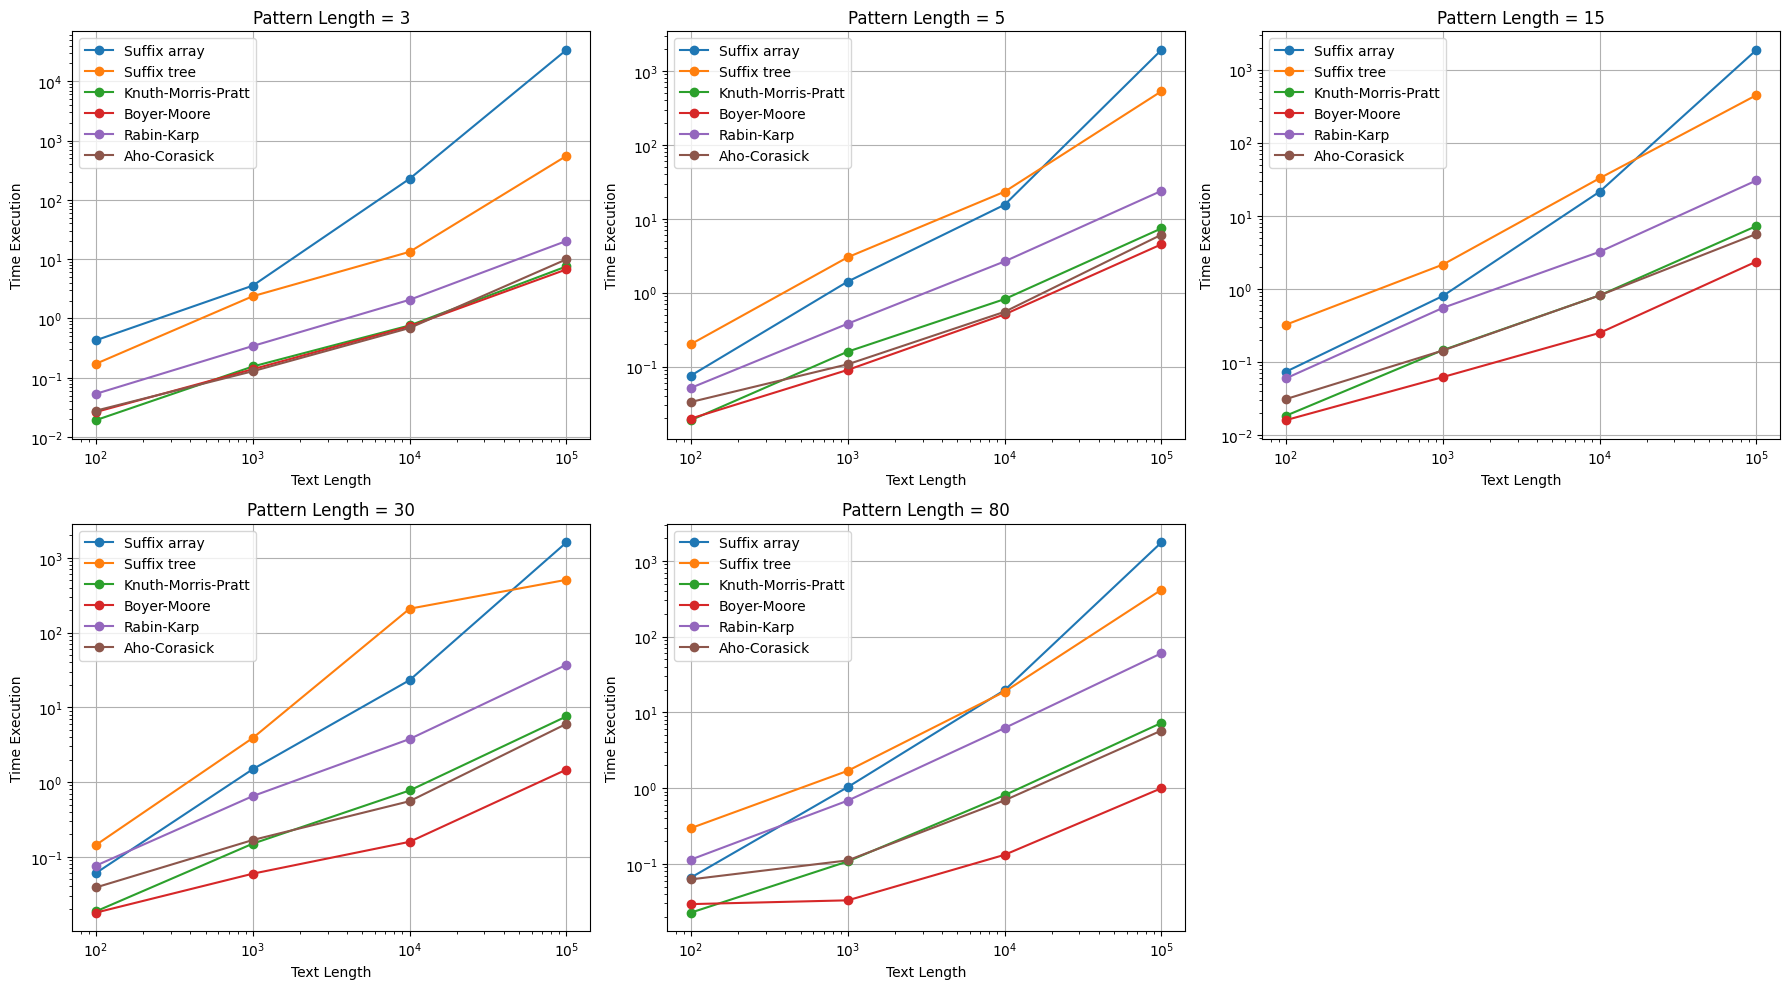

In [ ]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Time Execution')
    plt.title(f'Pattern Length = {pattern_len}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


In [118]:
df_mem = pd.Series(dmem)
df_mem.name = 'Memory usage'
df_mem.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_mem.unstack()

Pattern Length                         3        5       15      30      80
Algorithm          Text Length                                            
Aho-Corasick       100                0.0      0.0     0.0     0.0     0.0
                   1000               0.0      0.0     0.0     0.0     0.0
                   10000              0.0      0.0     0.0     0.0     0.0
                   100000             0.0      0.0     0.0     0.0     0.0
Boyer-Moore        100                0.0      0.0     0.0     0.0     0.0
                   1000               0.0      0.0     0.0     0.0     0.0
                   10000              0.0      0.0     0.0     0.0     0.0
                   100000             0.0      0.0     0.0     0.0     0.0
Knuth-Morris-Pratt 100                0.0      0.0     0.0     0.0     0.0
                   1000               0.0      0.0     0.0     0.0     0.0
                   10000              0.0      0.0     0.0     0.0     0.0
                   100000             0.0      0.0     0.0     0.0     0.0
Rabin-Karp         100                0.0      0.0     0.0     0.0     0.0
                   1000               0.0      0.0     0.0     0.0     0.0
                   10000              0.0      0.0     0.0     0.0     0.0
                   100000             0.0      0.0     0.0     0.0     0.0
Suffix array       100                0.0      0.0     0.0     0.0     0.0
                   1000               0.0      0.0     0.0     0.0     0.0
                   10000          22272.0    128.0     0.0   512.0     0.0
                   100000       1832196.0  34432.0 -9632.0  2688.0 -8076.0
Suffix tree        100                0.0      0.0     0.0     0.0     0.0
                   1000               0.0      0.0     0.0     0.0     0.0
                   10000              0.0    768.0  1280.0  2432.0   256.0
                   100000         20616.0   6512.0     0.0  2304.0     0.0

In [119]:
df_comp = pd.Series(dcomp)
df_comp.name = 'Memory usage'
df_comp.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_comp.unstack()

Pattern Length                      3       5        15       30       80
Algorithm          Text Length                                           
Aho-Corasick       100             198     188      185      171      121
                   1000           1998    1996     1986     1967     1894
                   10000         19952   19992    19915    19929    19879
                   100000       199316  199347   199299   198678   198892
Boyer-Moore        100              37      41       24       34       81
                   1000            353     255      135      111      119
                   10000          3810    2390     1138      774      598
                   100000        38499   24275    12461     8171     5799
Knuth-Morris-Pratt 100             108     102      108      102      100
                   1000           1058    1000     1000     1049     1101
                   10000         10455   10000    10685    10012    10430
                   100000       104356  104964   101114   107615   100130
Rabin-Karp         100              97     110      100      100      100
                   1000            997    1000     1000     1000     1000
                   10000         10069   10005    10015    10000    10000
                   100000       101023  100375   100135   100270   100800
Suffix array       100             168     110      735      930     1440
                   1000            684    1035     3120    19320    30960
                   10000         17223    9925   122220    59580   600320
                   100000       170532  288695  1497570  2782500  1520880
Suffix tree        100               4      19      837     2091     7727
                   1000             13    5006     1756    23794    69281
                   10000             7    3076      101    49510   128981
                   100000            6      11    40867   188821     4958